## Ocular Disease
----------------------------------

### 1. Import packages

In [ ]:
#!conda install -c https://conda.anaconda.org/plotly plotly -y
#!pip install pydot
#!pip install graphviz
#!conda install -c anaconda py-xgboost -y
#!pip install shap
#!pip install dill
#pip install matplotlib
#pip install seaborn
#pip install missingpy
#!pip3 install pickle5
#pip install statannot

In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from IPython.display import HTML
from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set plot style
from collections import Counter
import scipy as sp
import sklearn as sk
import sys
import plotly.express as px
import pydot
import pickle
import time
import xgboost as xgb
import shap
import dill
import gc
import subprocess
!pip3 install pickle5
import pickle5 as pickle
import sklearn.metrics as metrics
from scipy.stats import ranksums, ttest_ind
from statsmodels.stats.weightstats import ztest
import pylab 
import scipy.stats as stats
from scipy.stats import chi2_contingency
from matplotlib import rc
from cycler import cycler
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from statannot import add_stat_annotation

In [2]:
import os
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from collections import defaultdict

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import time

### 2. Removing pts w/ comp diff=NaN from Output

In [4]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/comps_over1mo_df.pkl', 'rb') as handle:
    comps_over1mo_df = pickle.load(handle) 

In [5]:
#1mo
opthal_time = comps_over1mo_df.OPTH_diff.copy()
opthal_time_drop=opthal_time.replace(np.nan, 'Drop', inplace=False)
opth_index = opthal_time_drop [opthal_time_drop == 'Drop'].index
print("Total Length: ", opthal_time_drop.shape)
print("Number to be dropped: ", opthal_time_drop[opthal_time_drop == 'Drop'].shape)
# dropping the NaNs from our OUTput data
opthal_time_drop.drop(opth_index, inplace=True)
opthal_time_final = opthal_time_drop.astype('float64')
print('Output dataset size:', opthal_time_final.shape)

Total Length:  (30854,)
Number to be dropped:  (23127,)
Output dataset size: (7727,)


### 3. Two way drop from input and output

In [6]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/phen_demos_vit_soc_lab.pkl', 'rb') as handle:
    phen_demos_vit_soc_lab = pickle.load(handle)

In [7]:
def drop_opth_list(output_df,input_df):
    extra_list=list(set(input_df.index.tolist())-set(output_df.index.tolist()))
    input_df_new=input_df.drop(extra_list)
    extra_list_rev=list(set(output_df.index.tolist())-set(input_df_new.index.tolist()))
    output_df_new=output_df.drop(extra_list_rev)
    print('length of input_df:', len(input_df))
    print('length of opth_df:', len(output_df))
    print('length of # to drop from  input:',len(extra_list))
    print('length of # to drop from  opth:',len(extra_list_rev))
    print('length of input_df after dropping',len(input_df_new))
    print('length of opth_df after dropping',len(output_df_new))
    print('Indexes equal?', np.all(input_df_new.index == output_df_new.index))
    return output_df_new, input_df_new

In [8]:
phen_demos_vit_soc_lab.shape

(15987, 1824)

In [9]:
opthal_time_final.shape

(7727,)

In [10]:
opthal_final, all_inputs=drop_opth_list(opthal_time_final, phen_demos_vit_soc_lab)

length of input_df: 15987
length of opth_df: 7727
length of # to drop from  input: 12913
length of # to drop from  opth: 4653
length of input_df after dropping 3074
length of opth_df after dropping 3074
Indexes equal? True


### 4. Make output diff times categorical using median as cut-off

In [11]:
opthal_final.median()

2.993901312141933

In [12]:
opthal_final.max()

16.23578855144185

<Figure size 864x576 with 0 Axes>

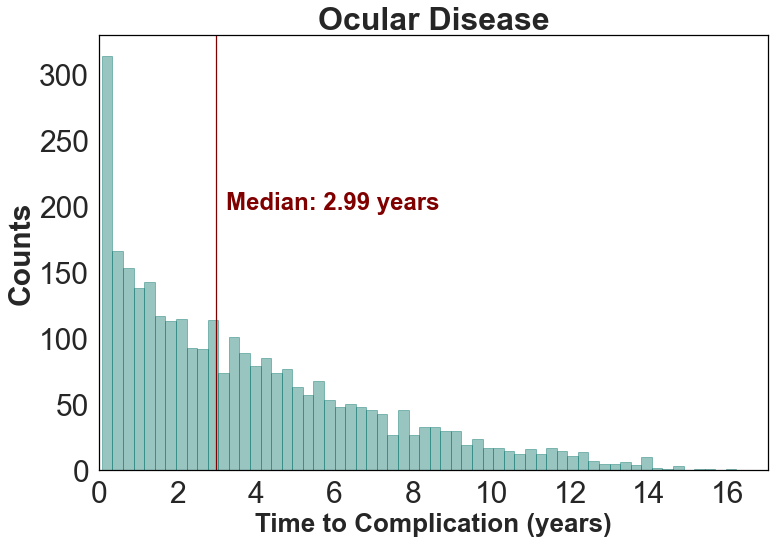

In [13]:
plt.figure(figsize=(12,8))
plt.rcParams['axes.facecolor']='white'
plt.rcParams["axes.edgecolor"] = "black"
plt.figure(figsize=(12,8))
h = plt.hist(opthal_final, edgecolor='#007066', 
             bins=60, alpha=0.4,
             color='#007066')
h = plt.axvline(opthal_final.median(), color='maroon', linestyle='solid', linewidth=1.25)
min_ylim, max_ylim = plt.ylim()
plt.text(opthal_final.median()*1.08, max_ylim*0.6, 
         'Median: {:.2f} years'.format(opthal_final.median()),
         fontsize=24, fontweight=600, color='maroon')
plt.xlim(left=0.0)
plt.xlabel('Time to Complication (years)', fontsize=26, fontweight=600)
plt.ylabel('Counts', fontsize=30, fontweight=600)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Ocular Disease", fontsize=32, fontweight=600)
plt.savefig(r'/Users/amomenzadeh/Desktop/DM_figures/opth_hist.svg', format='svg')
plt.show()

In [14]:
#assign 0 if opth complication occurred > OPTH diff median = slow
#assign 1 if opth complication occurred < OPTH diff median = fast
opthal_final_clf = opthal_final.copy()
opthal_final_clf = pd.Series(np.where((opthal_final_clf > opthal_final.median()), 0, opthal_final_clf), 
                            index=opthal_final_clf.index)
opthal_final_clf = pd.Series(np.where((opthal_final_clf > 0), 1, opthal_final_clf), 
                            index=opthal_final_clf.index)

In [15]:
num_negs = opthal_final_clf.value_counts()[0]
num_pos = opthal_final_clf.value_counts()[1]
neg_prop = num_negs/(num_negs + num_pos)
print(str(round(neg_prop*100,2)), '% negative', sep='')
print(str(100-round(neg_prop*100,2)), '% positive', sep='')

50.0% negative
50.0% positive


In [16]:
opthal_final_clf.shape

(3074,)

In [33]:
with open(r'./pickles/opthal_final_clf.pkl', 'wb') as handle:
    pickle.dump(opthal_final_clf, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 5. Final Inputs

In [29]:
opth_phen=all_inputs.iloc[:,:-103]
print(opth_phen.shape)
print(opth_phen.columns)

(3074, 1721)
Index(['ASCVD', 'Abdominal aortic aneurysm', 'Abdominal hernia',
       'Abdominal pain',
       'Abnormal Papanicolaou smear of cervix and cervical HPV',
       'Abnormal arterial blood gases', 'Abnormal chest sounds',
       'Abnormal coagulation profile',
       'Abnormal electrocardiogram [ECG] [EKG]',
       'Abnormal findings examination of lungs',
       ...
       'Vitamin B-complex deficiencies', 'Vitamin D deficiency',
       'Vitamin deficiency', 'Vitiligo', 'Voice disturbance',
       'Von willebrand's disease', 'Wegener's granulomatosis', 'Wheezing',
       'severe protein-calorie malnutrition', 'stress incontinence, female'],
      dtype='object', length=1721)


In [20]:
opth_all=all_inputs.drop(['duration_diab','vital_status_Alive','vital_status_Deceased'],axis=1)
opth_all.shape

(3074, 1821)

In [40]:
opth_demos_norm=opth_all.iloc[:,-100:-70]
opth_demos_norm.columns

Index(['age_at_diab', 'sex_Female', 'sex_Male', 'marital_status_Divorced',
       'marital_status_Legally Separated', 'marital_status_Married',
       'marital_status_Patient Refused', 'marital_status_Significant Other',
       'marital_status_Single', 'marital_status_Unknown',
       'marital_status_Widowed', 'employment_status_Disabled',
       'employment_status_Full Time', 'employment_status_Not Employed',
       'employment_status_On Active Military Duty',
       'employment_status_Part Time', 'employment_status_Patient Refused',
       'employment_status_Retired', 'employment_status_Self Employed',
       'employment_status_Student - Full Time',
       'employment_status_Student - Part Time', 'employment_status_Unknown',
       'race_American Indian or Alaska Native', 'race_Asian',
       'race_Black or African American', 'race_Multiracial',
       'race_Native Hawaiian or Other Pacific Islander', 'race_Other',
       'race_Unknown', 'race_White or Caucasian'],
      dtype='objec

In [41]:
opth_vitals_norm=opth_all.iloc[:,-70:-64]
opth_vitals_norm.columns

Index(['bmi', 'bp_diastolic', 'bp_systolic', 'pulse', 'temperature',
       'respiration'],
      dtype='object')

In [42]:
opth_social_norm=opth_all.iloc[:,-64:-35]
opth_social_norm.columns

Index(['alcohol_use_name_Never', 'alcohol_use_name_No',
       'alcohol_use_name_Not Asked', 'alcohol_use_name_Not Currently',
       'alcohol_use_name_Yes', 'ill_drug_user_name_Never',
       'ill_drug_user_name_No', 'ill_drug_user_name_Not Asked',
       'ill_drug_user_name_Not Currently', 'ill_drug_user_name_Yes',
       'tobacco_user_name_Never', 'tobacco_user_name_Not Asked',
       'tobacco_user_name_Passive', 'tobacco_user_name_Quit',
       'tobacco_user_name_Yes', 'cigarettes_yn_N', 'cigarettes_yn_Y',
       'pipes_yn_N', 'pipes_yn_Y', 'cigars_yn_N', 'cigars_yn_Y', 'snuff_yn_N',
       'snuff_yn_Y', 'chew_yn_N', 'chew_yn_Y',
       'smokeless_tob_use_name_Current User',
       'smokeless_tob_use_name_Former User',
       'smokeless_tob_use_name_Never Used', 'smokeless_tob_use_name_Unknown'],
      dtype='object')

In [46]:
opth_labs_norm=opth_all.iloc[:,-35:]
opth_labs_norm.columns

Index(['PLATELET COUNT', 'AST/SGOT', 'CALCIUM', 'GLUCOSE', 'BICARBONATE',
       'CHLORIDE', 'POTASSIUM', 'HEMATOCRIT', 'WHITE BLOOD CELL COUNT',
       'CREATININE', 'TOTAL PROTEIN', 'ALBUMIN', 'BLOOD UREA NITROGEN',
       'ANION GAP', 'EGFR', 'EGFR FOR AFRICAN AMERICANS', 'SODIUM',
       'BILIRUBIN TOTAL', 'ALKALINE PHOSPHATASE', 'ALT/SGPT', 'HEMOGLOBIN',
       'RED BLOOD CELL COUNT', 'MEAN CORPUSCULAR HGB',
       'MEAN CORPUSCULAR VOLUME', 'MEAN PLATELET VOLUME',
       'RED CELL DISTRIBUTION WIDTH', 'MEAN CORPUSCULAR HGB CONCENTRN',
       'MONOCYTE PERCENT', 'NEUTROPHIL PERCENT', 'EOSINOPHIL PERCENT',
       'LYMPH PERCENT', 'NEUTROPHIL ABSOLUTE', 'LYMPHOCYTE ABSOLUTE',
       'MONOCYTE ABSOLUTE', 'EOSINOPHIL ABSOLUTE'],
      dtype='object')

In [1175]:
with open(r'./pickles/opth_all.pkl', 'wb') as handle:
    pickle.dump(opth_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(r'./pickles/opth_phen.pkl', 'wb') as handle:
    pickle.dump(opth_phen, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(r'./pickles/opth_demos_norm.pkl', 'wb') as handle:
    pickle.dump(opth_demos_norm, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(r'./pickles/opth_vitals_norm.pkl', 'wb') as handle:
    pickle.dump(opth_vitals_norm, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(r'./pickles/opth_social_norm.pkl', 'wb') as handle:
    pickle.dump(opth_social_norm, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(r'./pickles/opth_labs_norm.pkl', 'wb') as handle:
    pickle.dump(opth_labs_norm, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 6. Make Table 1

In [8]:
with open(r'./pickles/phen_prediab_bin.pkl', 'rb') as handle:
    phen_prediab_bin = pickle.load(handle)
with open(r'./pickles/social_df.pkl', 'rb') as handle:
    social_df = pickle.load(handle)
with open(r'./pickles/vitals_df.pkl', 'rb') as handle:
    vitals_df = pickle.load(handle)
with open(r'./pickles/imp_labs.pkl', 'rb') as handle:
    imp_labs = pickle.load(handle)
with open(r'./pickles/opthal_final_clf.pkl', 'rb') as handle:
    opthal_final_clf = pickle.load(handle)

In [12]:
demos_all = pd.read_csv(r'/Users/amomenzadeh/Desktop/DM_csv/demos_all.csv',low_memory=False)

In [13]:
demos_R = pd.read_csv(r'/Users/amomenzadeh/Desktop/DM_csv/demos_from_R.csv',low_memory=False)

In [14]:
demos_R['patient_num'] = demos_all['patient_num'].values

In [15]:
demos_R=demos_R.set_index('patient_num')

In [18]:
opth_df=opthal_final_clf.to_frame(name='class')
opth_df.shape

(3074, 1)

In [19]:
all_opth=demos_R.merge(opth_df,left_index=True, right_index=True)
all_opth.shape

(3074, 8)

In [20]:
all_opth=all_opth.merge(imp_labs,left_index=True, right_index=True)
all_opth.shape

(3074, 43)

In [21]:
all_opth=all_opth.merge(vitals_df,left_index=True, right_index=True)
all_opth.shape

(3074, 49)

In [22]:
all_opth=all_opth.merge(social_df,left_index=True, right_index=True)
all_opth.shape

(3074, 58)

In [23]:
social_df.columns

Index(['alcohol_use_name', 'ill_drug_user_name', 'tobacco_user_name',
       'cigarettes_yn', 'pipes_yn', 'cigars_yn', 'snuff_yn', 'chew_yn',
       'smokeless_tob_use_name'],
      dtype='object')

In [24]:
all_opth=all_opth.merge(phen_prediab_bin,left_index=True, right_index=True)
all_opth.shape

(3074, 1779)

In [25]:
all_opth.shape

(3074, 1779)

In [26]:
i_o_fast=all_opth.loc[all_opth['class'] == 1]

In [27]:
i_o_slow=all_opth.loc[all_opth['class'] == 0]

In [246]:
print("\n--Median Slow---\n")
print(i_o_slow[['age_at_diab','duration_diab','GLUCOSE','CREATININE','bmi','EGFR']].median())
print("\n---Median Fast---\n")
print(i_o_fast[['age_at_diab','duration_diab','GLUCOSE','CREATININE','bmi','EGFR']].median())


--Median Slow---

age_at_diab       57.578184
duration_diab     10.750665
GLUCOSE          167.920000
CREATININE         0.861500
bmi               33.183800
EGFR              60.000000
dtype: float64

---Median Fast---

age_at_diab       61.583742
duration_diab      7.862173
GLUCOSE          161.000000
CREATININE         0.870000
bmi               32.998000
EGFR              60.000000
dtype: float64


In [249]:
print("\n--IQR Slow---\n")
print(i_o_slow[['age_at_diab','duration_diab','GLUCOSE','CREATININE','bmi','EGFR']].describe())
print("\n--IQR Fast---\n")
print(i_o_fast[['age_at_diab','duration_diab','GLUCOSE','CREATININE','bmi','EGFR']].describe())


--IQR Slow---

       age_at_diab  duration_diab      GLUCOSE   CREATININE          bmi  \
count  1537.000000    1537.000000  1537.000000  1537.000000  1537.000000   
mean     56.336204      10.461175   185.175556     0.915937    33.565164   
std      14.943301       2.901301    83.273510     0.253403     6.422481   
min      14.738153       3.162283    42.000000     0.200000    14.150000   
25%      46.987960       8.341307   124.000000     0.777600    29.470000   
50%      57.578184      10.750665   167.920000     0.861500    33.183800   
75%      67.128004      12.650772   210.000000     1.000000    37.150000   
max      93.201092      16.798701   508.000000     2.000000    60.840000   

              EGFR  
count  1537.000000  
mean     62.837383  
std      11.436419  
min      17.350000  
25%      60.000000  
50%      60.000000  
75%      65.860000  
max     100.000000  

--IQR Fast---

       age_at_diab  duration_diab      GLUCOSE   CREATININE          bmi  \
count  1537.000000

In [62]:
cat_variables=['sex', 'race', 'Essential hypertension','Hyperlipidemia','cigarettes_yn','smokeless_tob_use_name']

In [63]:
for i in cat_variables:
    print(i)
    print('Slow counts:', i_o_slow[i].value_counts())
    print('Slow percents:', i_o_slow[i].value_counts(normalize=True)*100)
    print('++++++++++++++++++++++++++++++++++++++')
    print(i)
    print('Fast counts:', i_o_fast[i].value_counts())
    print('Fast percents:', i_o_fast[i].value_counts(normalize=True)*100)
    print('++++++++++++++++++++++++++++++++++++++')

sex
Slow counts: Female    868
Male      669
Name: sex, dtype: int64
Slow percents: Female    56.47365
Male      43.52635
Name: sex, dtype: float64
++++++++++++++++++++++++++++++++++++++
sex
Fast counts: Female    804
Male      733
Name: sex, dtype: int64
Fast percents: Female    52.309694
Male      47.690306
Name: sex, dtype: float64
++++++++++++++++++++++++++++++++++++++
race
Slow counts: White or Caucasian                           1015
Black or African American                     424
Other                                          49
Asian                                          41
American Indian or Alaska Native                4
Native Hawaiian or Other Pacific Islander       3
Multiracial                                     1
Name: race, dtype: int64
Slow percents: White or Caucasian                           66.037736
Black or African American                    27.586207
Other                                         3.188029
Asian                                         2.667

In [60]:
crosstab = pd.crosstab(all_opth['smokeless_tob_use_name'], all_opth['class'])
stats.chi2_contingency(crosstab)

(218.08974550628366,
 5.19575908803682e-47,
 3,
 array([[   5.,    5.],
        [  14.,   14.],
        [ 359.,  359.],
        [1159., 1159.]]))

In [61]:
crosstab

class,0.0,1.0
smokeless_tob_use_name,,
Current User,4,6
Former User,7,21
Never Used,191,527
Unknown,1335,983


In [43]:
from scipy import stats
for i in cat_variables:
    print(i)
    crosstab = pd.crosstab(all_opth[i], all_opth['class'])
    print('chi-square:',stats.chi2_contingency(crosstab))
    print('+++++++++++++++++++++++++++++++++++++++')


sex
chi-square: (5.204759605211967, 0.022525129527199737, 1, array([[836., 836.],
       [701., 701.]]))
+++++++++++++++++++++++++++++++++++++++
race
chi-square: (19.203204971715586, 0.007574053560637107, 7, array([[   5.5,    5.5],
       [  45. ,   45. ],
       [ 382.5,  382.5],
       [   1.5,    1.5],
       [   2. ,    2. ],
       [  58.5,   58.5],
       [   1.5,    1.5],
       [1040.5, 1040.5]]))
+++++++++++++++++++++++++++++++++++++++
Essential hypertension
chi-square: (2.5464622624603055, 0.11054152729779251, 1, array([[588., 588.],
       [949., 949.]]))
+++++++++++++++++++++++++++++++++++++++
Hyperlipidemia
chi-square: (26.17186499065489, 3.123402984216219e-07, 1, array([[1049.5, 1049.5],
       [ 487.5,  487.5]]))
+++++++++++++++++++++++++++++++++++++++
cigarettes_yn
chi-square: (1.0612331656406098, 0.3029340969253571, 1, array([[1258.5, 1258.5],
       [ 278.5,  278.5]]))
+++++++++++++++++++++++++++++++++++++++
smokeless_tob_use_name
chi-square: (218.08974550628366, 5.1

In [250]:
listofname=['age_at_diab','duration_diab','GLUCOSE','CREATININE','bmi','EGFR']

for x in listofname:
    print(x)
    print('fast var normality:', stats.shapiro(i_o_fast[x]))
    print('slow var normality:',stats.shapiro(i_o_slow[x]))
    
    #print('t-test: ',ttest_ind(i_o_fast[x],i_o_slow[x], equal_var=True))
    print('ranksum: ',ranksums(i_o_fast[x],i_o_slow[x]))
    #print('z-test: ', ztest(i_o_fast[x],i_o_slow[x]))
    print('+++++++++++++++++++++++++++++++++++++++')

age_at_diab
fast var normality: ShapiroResult(statistic=0.9873067140579224, pvalue=2.388175490697364e-10)
slow var normality: ShapiroResult(statistic=0.9859337210655212, pvalue=4.4370764007428676e-11)
ranksum:  RanksumsResult(statistic=7.824823678937728, pvalue=5.083689192764585e-15)
+++++++++++++++++++++++++++++++++++++++
duration_diab
fast var normality: ShapiroResult(statistic=0.9807047843933105, pvalue=1.6551033276118038e-13)
slow var normality: ShapiroResult(statistic=0.9838185906410217, pvalue=4.020124511061596e-12)
ranksum:  RanksumsResult(statistic=-21.979429876810453, pvalue=4.5311616977578495e-107)
+++++++++++++++++++++++++++++++++++++++
GLUCOSE
fast var normality: ShapiroResult(statistic=0.9016240239143372, pvalue=2.507483675162767e-30)
slow var normality: ShapiroResult(statistic=0.9068310260772705, pvalue=1.1955502780857347e-29)
ranksum:  RanksumsResult(statistic=-2.1263814671716714, pvalue=0.03347150962280172)
+++++++++++++++++++++++++++++++++++++++
CREATININE
fast var nor

### 7. Random Search on MCW cluster

In [ ]:
#inputs
input_dict = {
    'Codes': opth_phen,
    'Demos': opth_demos,
    'Vitals': opth_vitals,
    'Social':opth_social,
    'Labs': opth_labs,
    'All': opth_all}

#parameters
Dummy_params = {'strategy':['most_frequent']}

GB_params = {
    'learning_rate': np.linspace(0.1, 1, 19),
    'max_depth': np.linspace(5, 100, 20),
    'max_features': ['auto','sqrt','log2'],
    'min_samples_leaf': [2, 10, 20, 40, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'min_samples_split': [2, 10, 20, 40, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'subsample':[0.8, 1],
    'n_estimators':[10, 50, 100, 250, 500, 1000, 2000, 3000]}

SVC_params = {
    'C': [0.1,1,10,100],
    'kernel':['poly', 'rbf', 'sigmoid'],
    'gamma':[1,0.1,0.01,0.001]}

ET_params = {
    'bootstrap': [True, False],
    'max_depth': np.linspace(5, 100, 20),
    'max_features':['auto','sqrt','log2'],
    'min_samples_leaf': [2, 10, 20, 40, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'min_samples_split': [2, 10, 20, 40, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'n_estimators':[10, 50, 100, 250, 500, 1000, 2000, 3000]}

RF_params = {
    'bootstrap': [True, False],
    'max_depth': np.linspace(5, 100, 20),
    'max_features':['auto','sqrt','log2'],
    'min_samples_leaf': [2, 10, 20, 40, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'min_samples_split': [2, 10, 20, 40, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'n_estimators':[10, 50, 100, 250, 500, 1000, 2000, 3000]}

ada_params = {
    'learning_rate': np.linspace(0.1, 1, 19),
    'n_estimators':[10, 50, 100, 250, 500, 1000, 2000, 3000]}

LR_params = {
            'C':[0.01,0.1,1,10,100],
            'penalty':['l2','none'],
            'solver':['newton-cg','lbfgs', 'sag', 'saga'],
            'max_iter':[100,200,300]}
            
models_dict = {
    'Dummy': DummyClassifier(),
    'SVC': SVC(probability=True),
    'GB': GradientBoostingClassifier(),
    'ET': ExtraTreesClassifier(),
    'RF': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LR': LogisticRegression()}

params_dict = {
    'Dummy': Dummy_params,
    'SVC': SVC_params,
    'GB': GB_params,
    'ET': ET_params,
    'RF': RF_params,
    'AdaBoost': ada_params,
    'LR': LR_params}

#run randomsearch
opth_all_score_dict = {}
opth_all_model_dict = {}

for i in input_dict.keys():
    print('Input:', i)
    temp_1 = {}
    temp_2 = {}
    Xtrain, Xtest, ytrain, ytest = train_test_split(input_dict[i], opthal_final_clf, random_state=42, test_size=0.2) 
    for x in models_dict.keys():
        print(x)
        clf = RandomizedSearchCV(models_dict[x], param_distributions= params_dict[x],scoring='roc_auc',refit=True,cv=5, n_jobs=47,verbose=3, n_iter=1000)
        clf.fit(Xtrain, ytrain)
        print(clf.best_estimator_)
        print(clf.best_score_)
        temp_1[x] = clf.best_estimator_
        temp_2[x] = clf.best_score_
    opth_all_model_dict[i] = temp_1
    opth_all_score_dict[i] = temp_2

# save
with open('opth_phenbin_all_score_dict.pkl', 'wb') as tmpfile:
    pickle.dump(opth_all_score_dict, tmpfile)
with open('opth_phenbin_all_model_dict.pkl', 'wb') as tmpfile:
    pickle.dump(opth_all_model_dict, tmpfile)

opth_score_df=pd.DataFrame.from_dict(opth_all_score_dict)
opth_score_df.to_csv('opth_phenbin_score_df.csv')

In [11]:
with open(r'./pickles/opth_phenbin_all_model_dict.pkl', 'rb') as handle:
    opth_all_model_dict = pickle.load(handle)
with open(r'./pickles/opth_phenbin_all_score_dict.pkl', 'rb') as handle:
    opth_all_score_dict = pickle.load(handle)

### 8. Evaluate test set

In [ ]:
with open(r'./pickles/opth_demos_norm.pkl', 'rb') as handle:
    opth_demos_norm = pickle.load(handle) 
with open(r'./pickles/opth_vitals_norm.pkl', 'rb') as handle:
    opth_vitals_norm = pickle.load(handle) 
with open(r'./pickles/opth_social_norm.pkl', 'rb') as handle:
    opth_social_norm = pickle.load(handle) 
with open(r'./pickles/opth_labs_norm.pkl', 'rb') as handle:
    opth_labs_norm = pickle.load(handle) 
with open(r'./pickles/opthal_final_clf.pkl', 'rb') as handle:
    opthal_final_clf = pickle.load(handle)
with open(r'./pickles/opth_all.pkl', 'rb') as handle:
    opthal_all = pickle.load(handle) 
with open(r'./pickles/opth_phen.pkl', 'rb') as handle:
    opth_phen = pickle.load(handle) 

In [37]:
opth_score_df = pd.read_csv(r'/Users/amomenzadeh/Desktop/DM_csv/opth_phenbin_score_df.csv',low_memory=False)

In [38]:
#train data (80%)
opth_score_df

,Unnamed: 0,Codes,Demos,Vitals,Social,Labs,All
0,Dummy,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,SVC,0.590974,0.591141,0.540029,0.623225,0.600365,0.671203
2,GB,0.588964,0.587798,0.538546,0.633493,0.605950,0.671200
3,ET,0.594023,0.561059,0.548418,0.631640,0.604121,0.672770
4,RF,0.602673,0.577007,0.542257,0.632781,0.611866,0.676957
5,AdaBoost,0.563924,0.586706,0.538658,0.626261,0.600706,0.661525
6,LR,0.590187,0.589620,0.537250,0.619993,0.598118,0.665023


In [47]:
input_dict = {
    'Codes': opth_phen,
    'Demos': opth_demos_norm,
    'Vitals': opth_vitals_norm,
    'Social': opth_social_norm,
    'Labs': opth_labs_norm,
    'All': opth_all}

In [48]:
auroc = {}
fpr = {}
tpr = {}
threshold = {}

for x in opth_all_model_dict.keys():
    temp1 = {}
    temp2 = {}
    temp3 = {}
    temp4 = {} 
    Xtrain, Xtest, ytrain, ytest = train_test_split(input_dict[x], opthal_final_clf, random_state=42, test_size=0.2) 
    for y in opth_all_model_dict[x].keys():
        model= opth_all_model_dict[x][y]
        ypred = model.predict(Xtest)
        probs = model.predict_proba(Xtest)
        pos_probs = probs[:, 1]
        temp1[y] = roc_auc_score(ytest, pos_probs)
        temp2[y], temp3[y], temp4[y] = metrics.roc_curve(ytest, pos_probs)
    auroc[x] = temp1
    fpr[x] = temp2
    tpr[x] = temp3
    threshold [x] = temp4

In [49]:
#test data (20%)
pd.DataFrame.from_dict(auroc)

,Codes,Demos,Vitals,Social,Labs,All
Dummy,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
SVC,0.567048,0.607701,0.507260,0.632816,0.662408,0.648533
GB,0.538890,0.608558,0.504562,0.609992,0.644559,0.690794
ET,0.530233,0.600869,0.520453,0.632075,0.656201,0.681607
RF,0.550030,0.597593,0.526576,0.630599,0.623857,0.695525
AdaBoost,0.502350,0.612183,0.508229,0.598906,0.585597,0.707474
LR,0.566022,0.618602,0.473212,0.619957,0.667928,0.670632


### 9. Make overlayed AUROC plot

In [123]:
# Set the global font to be DejaVu Sans, size 10 
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
# Set the font used for MathJax
rc('mathtext',**{'default':'regular'})
%matplotlib inline
# The following %config line changes the inline figures to have a higher DPI.
%config InlineBackend.figure_format = 'retina'

<Figure size 504x504 with 0 Axes>

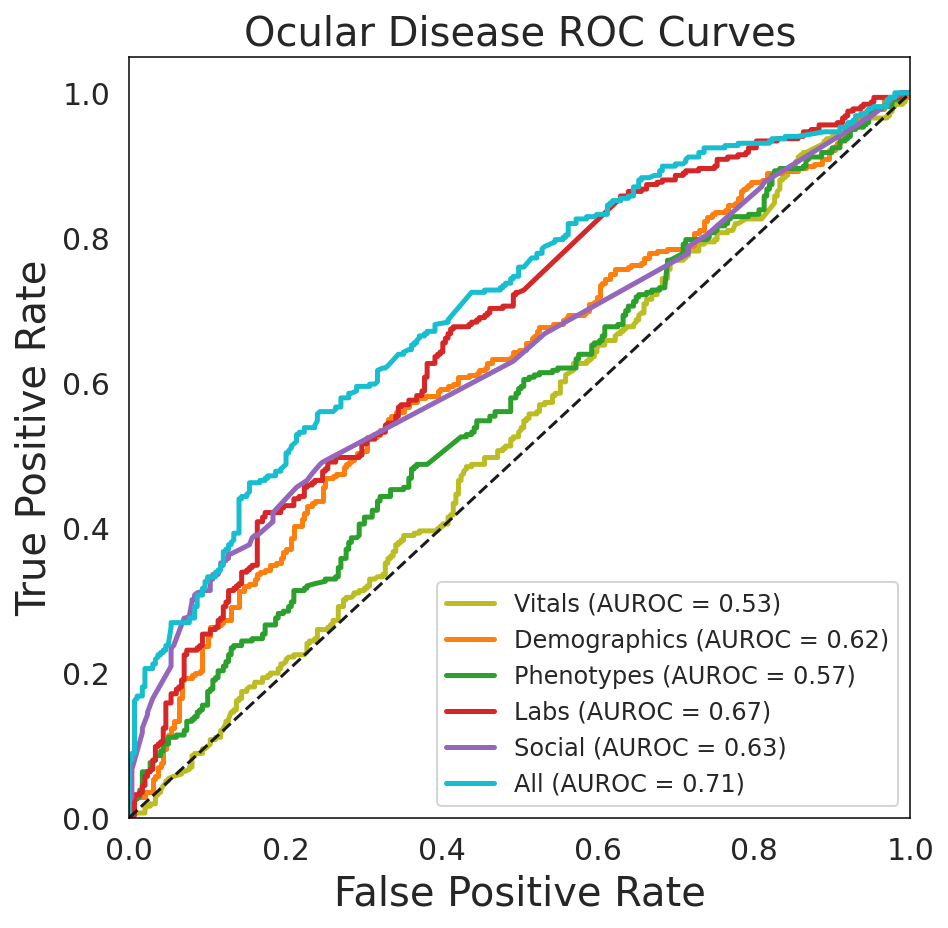

<Figure size 504x504 with 0 Axes>

In [141]:
plt.rcParams['figure.figsize']=7,7
plt.rcParams['axes.facecolor']='white'
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.75
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=['#bcbd22', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf'])

plt.plot(fpr['Vitals']['RF'], tpr['Vitals']['RF'],
         label='Vitals (AUROC = {0:0.2f})'
               ''.format(auroc['Vitals']['RF']),
         linewidth=2.5)

plt.plot(fpr['Demos']['LR'], tpr['Demos']['LR'],
         label='Demographics (AUROC = {0:0.2f})'
               ''.format(auroc['Demos']['LR']),
         linewidth=2.5)


plt.plot(fpr['Codes']['SVC'], tpr['Codes']['SVC'],
         label='Phenotypes (AUROC = {0:0.2f})'
               ''.format(auroc['Codes']['SVC']),
         linewidth=2.5)

plt.plot(fpr['Labs']['LR'], tpr['Labs']['LR'],
         label='Labs (AUROC = {0:0.2f})'
               ''.format(auroc['Labs']['LR']),
         linewidth=2.5)

plt.plot(fpr['Social']['SVC'], tpr['Social']['SVC'],
         label='Social (AUROC = {0:0.2f})'
               ''.format(auroc['Social']['SVC']),
         linewidth=2.5)

plt.plot(fpr['All']['AdaBoost'], tpr['All']['AdaBoost'],
         label='All (AUROC = {0:0.2f})'
               ''.format(auroc['All']['AdaBoost']),
         linewidth=2.5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20, fontweight=100)
plt.ylabel('True Positive Rate', fontsize=20, fontweight=100)
plt.title('Ocular Disease ROC Curves', fontsize=20, fontweight=100)
plt.legend(loc="lower right",fontsize=12)
plt.grid(False)
plt.savefig(r'./figures/Opth_AUROC.svg', format='svg')
plt.figure()

### 10. Make calibration plot

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(input_dict['All'], opthal_final_clf, random_state=42, test_size=0.2) 

In [53]:
model=opth_all_model_dict['All']['AdaBoost']
print(model)

AdaBoostClassifier(learning_rate=0.15000000000000002)


AUROC: 0.7074742813598071
Brier Score: 0.24202951697421313


<Figure size 504x504 with 0 Axes>

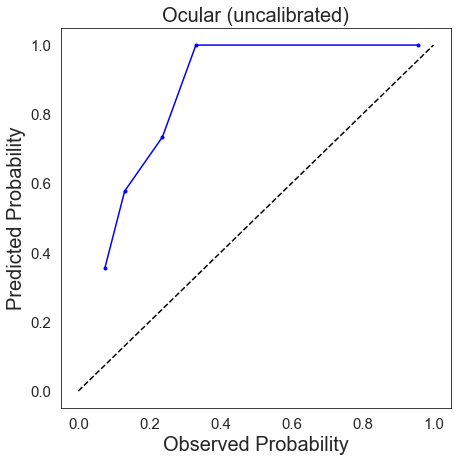

<Figure size 504x504 with 0 Axes>

In [54]:
plt.rcParams['figure.figsize']=7,7
plt.rcParams['axes.facecolor']='white'
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.75

probs = model.predict_proba(Xtest)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(ytest, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--', color="black")
# plot model reliability
plt.plot(mpv, fop, marker='.', color="blue")

ypred = model.predict(Xtest)
probs = model.predict_proba(Xtest)
pos_probs = probs[:, 1]
rocauc = roc_auc_score(ytest, pos_probs)
print('AUROC:', rocauc)
bs=brier_score_loss(ytest, pos_probs)
print('Brier Score:', bs)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Observed Probability', fontsize=20, fontweight=100)
plt.ylabel('Predicted Probability', fontsize=20, fontweight=100)
plt.title('Ocular (uncalibrated)', fontsize=20, fontweight=100)
plt.grid(False)
plt.figure()

AUCROC: 0.7115807967486559
Brier Score: 0.22291275284752826


<Figure size 504x504 with 0 Axes>

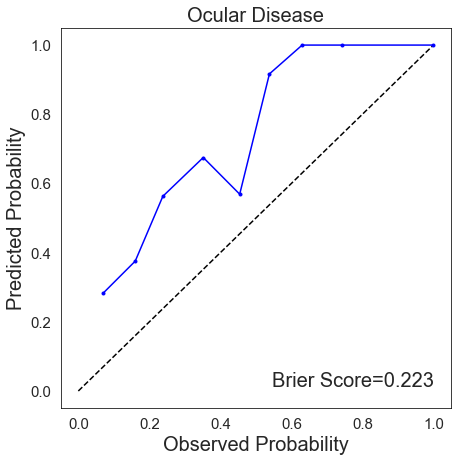

<Figure size 504x504 with 0 Axes>

In [64]:
plt.rcParams['figure.figsize']=7,7
plt.rcParams['axes.facecolor']='white'
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.75

from sklearn.calibration import CalibratedClassifierCV
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(Xtrain, ytrain)
# predict probabilities
probs = calibrated.predict_proba(Xtest)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(ytest, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--',color="black")
# plot calibrated reliability
plt.plot(mpv, fop, marker='.',color="blue")

ypred = calibrated.predict(Xtest)
probs = calibrated.predict_proba(Xtest)
pos_probs = probs[:, 1]
rocauc = roc_auc_score(ytest, pos_probs)
print('AUCROC:', rocauc)
bs=brier_score_loss(ytest, pos_probs)
print('Brier Score:', bs)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Observed Probability', fontsize=20, fontweight=100)
plt.ylabel('Predicted Probability', fontsize=20, fontweight=100)
plt.title('Ocular Disease', fontsize=20, fontweight=100)
plt.grid(False)
matplotlib.pyplot.text(1,0,'Brier Score=0.223', horizontalalignment='right',
     verticalalignment='bottom',fontsize=20)
plt.savefig(r'./figures/opth_calib_plot.svg', format='svg')
plt.figure()

### 11. encounters between T2DM dx and comp

In [202]:
opthal_final_clf.to_excel('opth_out.xlsx')

In [17]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/init_comps_dict.pkl', 'rb') as handle:
    init_comps_dict = pickle.load(handle)

In [18]:
# creating new dataframe from the above dictionary for time of first complication with the patient number as the index
comps_time_df = pd.DataFrame.from_dict(init_comps_dict, orient='index')
comps_time_df = comps_time_df.apply(pd.to_datetime, errors='coerce')

# sort table by patient number (index)
comps_time_df.sort_index(inplace=True)

In [19]:
comps_time_df.drop(['initial_KIDNEY','initial_CVD','initial_NEUROPATH'],axis=1,inplace=True)

In [20]:
time_to_opth=opthal_final.to_frame('time_to_opth(yr)')

In [21]:
merge = comps_time_df.merge(time_to_opth, left_index=True, right_index=True)

In [22]:
encounters = pd.read_csv(r'/Users/amomenzadeh/Desktop/DM_csv/opth_encounters.csv',low_memory=False)

In [23]:
encounters.drop(['department_name', 'department_id', 'department_external_name',
       'department_specialty', 'payor_type_primary_c','age_at_visit_years',
       'payor_type_primary_name', 'payer_type_secondary_c','visit_type_id',
       'payer_type_secondary_name', 'appt_status_c', 'appt_status_name','discharge_status_c', 'discharge_status_name',
       'length_of_stay_days', 'hosp_serv_c', 'hosp_serv_name','visit_type_name',
       'adm_for_surg_yn', 'surgical_svc_c', 'surgical_svc_name', 'drg','visit_date_shifted',
       'drg_type', 'drg_name', 'visit_provider_id', 'visit_provider_name','admit_date_shifted',
       'visit_provider_title', 'visit_provider_npi', 'admission_provider_id',
       'admission_provider_name', 'admission_provider_title','admit_source_c','admit_source_name','discharge_date_shifted',
       'admission_provider_npi', 'sourcesystem_cd','encounter_num','enc_type','src_enc_type_c'],inplace=True, axis=1)

In [24]:
encounters.i2b2_date_shifted = pd.to_datetime(encounters.i2b2_date_shifted, format = '%Y-%m-%d') # converted dx date column to datetime

In [25]:
encounters=encounters.sort_values(by='i2b2_date_shifted')

In [26]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/opth_enc.pkl', 'wb') as handle:
    pickle.dump(encounters, handle)

In [27]:
visits=[]
for x in merge.index:
    enc=encounters[(encounters.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= merge.loc[[x]].initial_OPTH.values)]
    visits.append(len(before_comp.i2b2_date_shifted.unique()))

In [28]:
merge['visits_bw']=visits

In [29]:
merge['visits_bw/yr']=merge['visits_bw']/merge['time_to_opth(yr)']

In [30]:
merge['output_class']=opthal_final_clf

In [31]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/opth_merge.pkl', 'wb') as handle:
    pickle.dump(merge, handle)

In [32]:
fast=merge[merge['output_class']==1]

In [33]:
slow=merge[merge['output_class']==0]

In [34]:
fast.describe()

,time_to_opth(yr),visits_bw,visits_bw/yr,output_class
count,1537.000000,1537.000000,1537.000000,1537.0
mean,1.266294,34.417046,36.234322,1.0
std,0.874745,39.050445,37.776929,0.0
min,0.084875,2.000000,0.785468,1.0
25%,0.443541,9.000000,12.682031,1.0
50%,1.152659,21.000000,25.346010,1.0
75%,1.990458,45.000000,47.128065,1.0
max,2.989794,345.000000,373.543466,1.0


In [35]:
slow.describe()

,time_to_opth(yr),visits_bw,visits_bw/yr,output_class
count,1537.000000,1537.000000,1537.000000,1537.0
mean,6.352728,124.178269,20.051985,0.0
std,2.690300,141.842643,19.588284,0.0
min,2.998008,2.000000,0.154961,0.0
25%,4.180784,32.000000,5.821962,0.0
50%,5.672943,80.000000,15.084261,0.0
75%,7.926241,164.000000,28.262812,0.0
max,16.235789,1758.000000,200.861131,0.0


In [36]:
fast=merge[merge['output_class']==1]

In [37]:
merge.loc[merge['output_class']==1 ,'output_class']='Fast'
merge.loc[merge['output_class']==0 ,'output_class']='Slow'

Slow v.s. Fast: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.142e-50 U_stat=8.128e+05


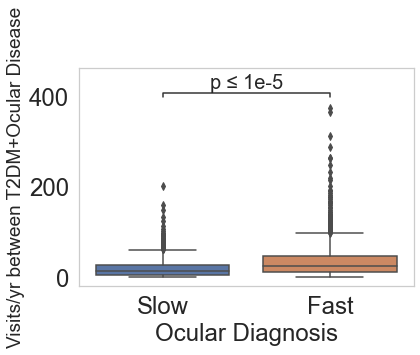

In [38]:
sns.set(style="whitegrid")

x = "output_class"
y = "visits_bw/yr"
order = ['Slow', 'Fast']
ax = sns.boxplot(data=merge, x=x, y=y, order=order)
add_stat_annotation(ax, data=merge, x=x, y=y, order=order,
                    box_pairs=[('Slow','Fast')], 
                    test='Mann-Whitney', text_format='simple', loc='inside', verbose=2,fontsize=20)
_ = ax.set(xlabel="Diagnosis of Diabetic Complication", ylabel="Visits between T2DM and Ocular Disease Diagnoses")

ax.tick_params(labelsize=24)
ax.set_xlabel("Ocular Diagnosis",fontsize=24)
ax.set_ylabel("Visits/yr between T2DM+Ocular Disease",fontsize=19)
sns.set(rc={'figure.figsize':(6.5,6)})
ax.grid(False)
plt.savefig(r'/Users/amomenzadeh/Desktop/DM_figures/opth_visits.svg', format='svg',bbox_inches='tight')
plt.show()